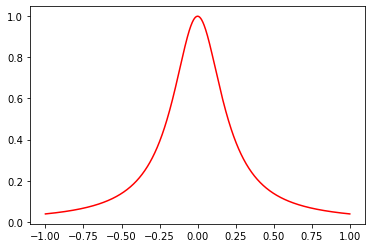

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import least_squares

# Define the function to be interpolated
def f(x):
    return 1 / (1 + 25 * x ** 2)

# Define the interval to interpolate over
a = -1
b = 1

# Define the number of data points to use
n = 11

# Generate a set of points to evaluate the interpolation
xx = np.linspace(a, b, 1000)
yy = f(xx)

# Generate a set of data points for interpolation
x_data = np.linspace(a, b, n)
y_data = f(x_data)

# Plot the original function
plt.plot(xx, yy, 'r-', label='f(x)')



c:\Users\andrew.kennedy\anaconda3_new\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


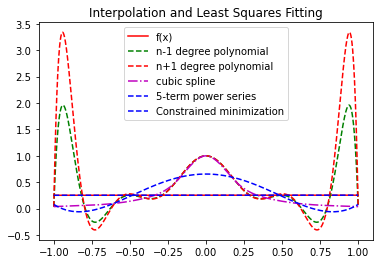

The plot above demonstrates how increasing the order of the approximating polynomial serves 
only to exacerbate the oscillation towards the ends of the interval. In general, it can be shown 
that for a polynomial of degree <=n, the interpolation error increases monotonically with the degree 
of the polynomial. 
Least Squares Fitting using a 5-term power series provides an adequate solution in this case 
but is outperformed by cubic spline interpolation


In [70]:
# Plot the original function
plt.plot(xx, yy, 'r-', label='f(x)')

# Plot the interpolating polynomial of degree n-1
p = np.polyfit(x_data, y_data, n-1)
yy = np.polyval(p, xx)
plt.plot(xx, yy, 'g--', label='n-1 degree polynomial')

# Plot the interpolating polynomial of degree n+1
p = np.polyfit(x_data, y_data, n+1)
yy = np.polyval(p, xx)
plt.plot(xx, yy, 'r--', label='n+1 degree polynomial')

# Plot the cubic spline interpolation
cs = CubicSpline(x_data, y_data)
yy = cs(xx)
plt.plot(xx, yy, 'm-.', label='cubic spline')

# Least squares fitting solution to Runge's phenomenon
m = 5  # number of terms in the power series
x = np.linspace(a, b, m)
y = f(x)

def power_series(x, coeffs):
    return np.sum([coeffs[i] * x ** i for i in range(len(coeffs))], axis=0)

def residual(coeffs):
    return power_series(x_data, coeffs) - y_data

coeffs0 = np.zeros(m)
res = least_squares(residual, coeffs0)

yy = power_series(xx, res.x)
plt.plot(xx, yy, 'b--', label=f'{m}-term power series')


# Constrained minimization solution to Runge's phenomenon
def polynomial(x, c):
    return np.sum([c[i] * x ** i for i in range(len(c))], axis=0)

def obj(c):
    return np.sum((polynomial(x_data, c) - y_data) ** 2)

cons = LinearConstraint(np.eye(n), 0, np.inf)
c0 = np.zeros(n)
res = minimize(obj, c0, method='trust-constr', constraints=cons)
yy = polynomial(xx, res.x)
plt.plot(xx, yy, 'b--', label='Constrained minimization')

# Add a legend and title
plt.legend()
plt.title("Interpolation and Least Squares Fitting")

# Show the plot
plt.show()

print("The plot above demonstrates how increasing the order of the approximating polynomial serves", 
"\nonly to exacerbate the oscillation towards the ends of the interval. In general, it can be shown", 
"\nthat for a polynomial of degree <=n, the interpolation error increases monotonically with the degree",
"\nof the polynomial.",
"\nLeast Squares Fitting using a 5-term power series provides an adequate solution in this case", 
"\nbut is outperformed by cubic spline interpolation" )